# Basic Analyses:
  


In [1]:
import subprocess
label = subprocess.check_output(["git", "rev-parse","--verify","HEAD"]).strip()
print('GIT SHA: '+str(label))

GIT SHA: e4c1e6e03f13d71eafc9b25443636876b885d26d


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss


/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import Triplets_Correlations_Scatterplots
imp.reload( Triplets_Correlations_Scatterplots)
from  Triplets_Correlations_Scatterplots import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

# Run model and prepare dataSets
- model_param_df
- model_summary_df
- triplets

In [7]:
def process_model_rl(model = 'ambi_both', which_trial = 'all'):
    
    kwargs = {}
    
    if model == 'ambi_both':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
    elif model == 'ambi_present':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
    elif model == 'ambi_level':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

    # for gain
    kwargs['task']='gain'

    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_g, model_param_df_g=(all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial))

    # for loss
    kwargs['task']='loss'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # for shock
    kwargs['task']='shock'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
    model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # stacking all the df's for a single model 
    model_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
    model_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))
    
    #reverse beta when necessary
    # magnitude
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    # probability
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    
    return(model_param_df, model_summary_df)

In [8]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'all')
#change MIDs to match between gainloss and shock versions
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]

In [9]:
triplet_intercept = triplet_rl(model_param_df, 'intercept_r')
triplet_magdiff = triplet_rl(model_param_df, 'mag_diff_rl')
triplet_probdiff = triplet_rl(model_param_df, 'prob_diff_rl')
triplet_ambiguityLevel = triplet_rl(model_param_df, 'sqrt_prop_revealed_diff_rl')

# spearman correlations (r and pvalue) 

## correlation between tasks for each parameter

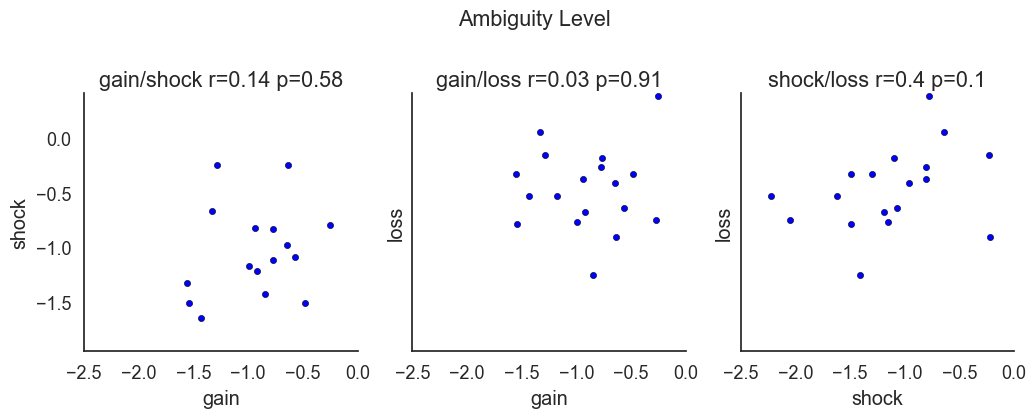

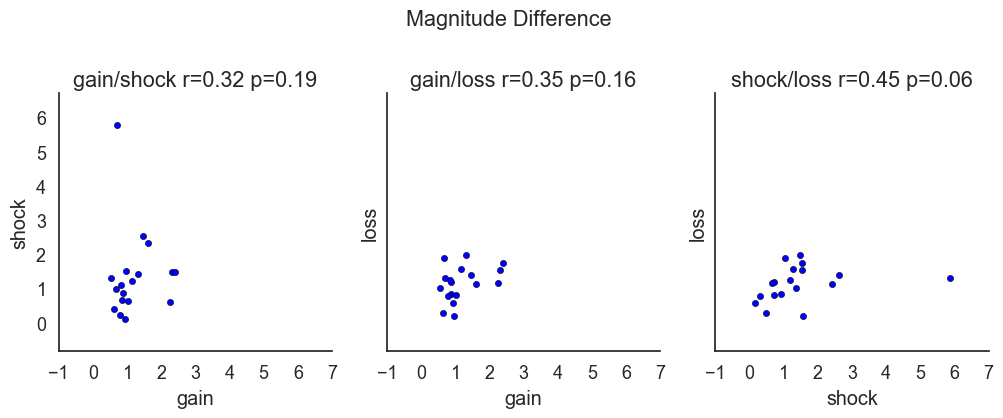

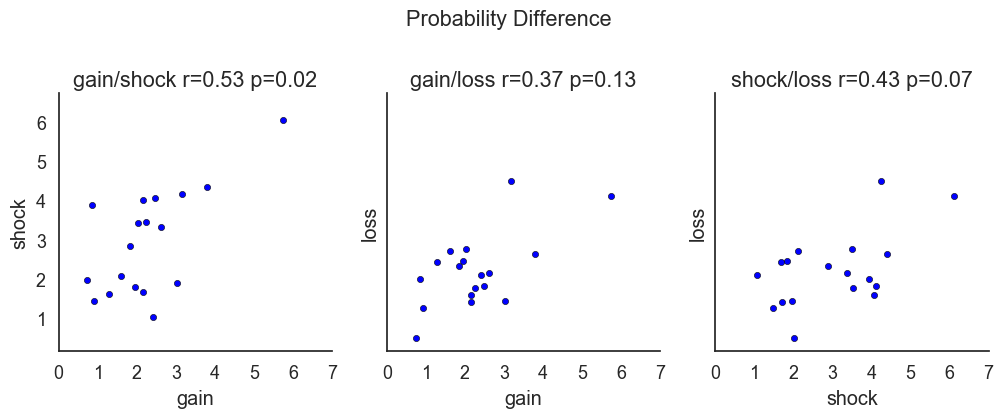

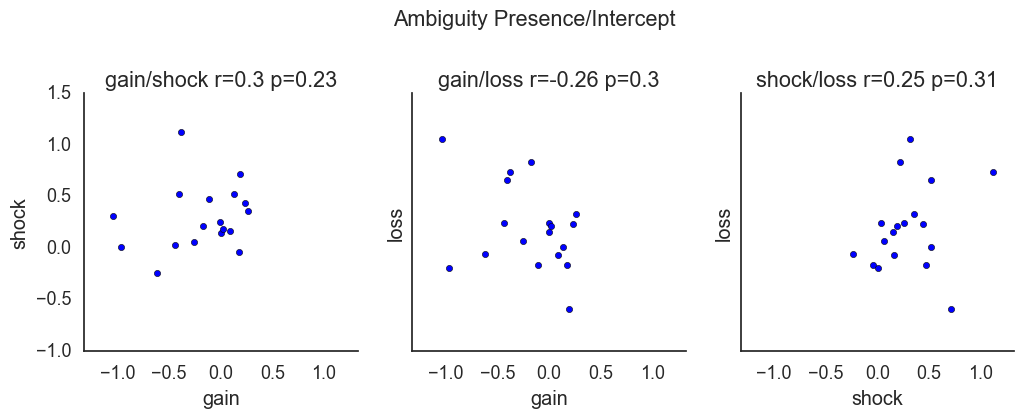

In [13]:
plotTriplet(triplet_ambiguityLevel, 'Ambiguity Level')
plotTriplet(triplet_magdiff, 'Magnitude Difference')
plotTriplet(triplet_probdiff, 'Probability Difference')
f=plotTriplet(triplet_intercept, 'Ambiguity Presence/Intercept')

## correlation between magdiff and probdiff for every task

In [14]:
triplet_magdiff

,MID,gain,se_gain,loss,se_loss,shock,se_shock
0,vp06,0.685627,0.25995614916,1.961943,0.392618031585,1.051000,0.303452243135
1,vp07,1.309930,0.303893276894,2.043443,0.399511792774,1.484142,0.427496442619
2,vp10,1.607471,0.350325492274,1.208322,0.33996677842,2.408800,0.448242727547
3,vp11,2.321272,0.525240944004,1.600758,0.369970590331,1.544682,0.458980584828
4,vp12,0.629779,0.267172215035,0.364677,0.300673714966,0.480288,0.289561755496
5,vp13,1.157486,0.317360524795,1.649949,0.348428680838,1.282595,0.375808656255
6,vp15,0.932645,0.290808835825,0.656599,0.29735733321,0.161267,0.312781301941
7,vp16,2.404648,0.598589074563,1.814939,0.469807047545,1.551139,0.537606724847
8,vp17,1.470537,0.357812762533,1.475994,0.330471593759,2.612511,0.551921408515
9,vp18,0.542138,0.316874649088,1.093764,0.301662616803,1.366717,0.308474756323


In [16]:
gain = triplet_magdiff.drop(triplet_magdiff.iloc[:, 2:8], axis = 1)
gain = gain.rename(columns={'gain': 'magdiff'})
gain['probdiff'] = triplet_probdiff['gain']


In [18]:
loss = triplet_magdiff.drop(triplet_magdiff.iloc[:,[1,2,4,5,6]], axis = 1)
loss = loss.rename(columns={'loss': 'magdiff'})
loss['probdiff'] = triplet_probdiff['loss']


In [21]:
shock = triplet_magdiff.drop(triplet_magdiff.iloc[:, [1,2,3,4,6]], axis = 1)
shock = shock.rename(columns={'shock': 'magdiff'})
shock['probdiff'] = triplet_probdiff['shock']


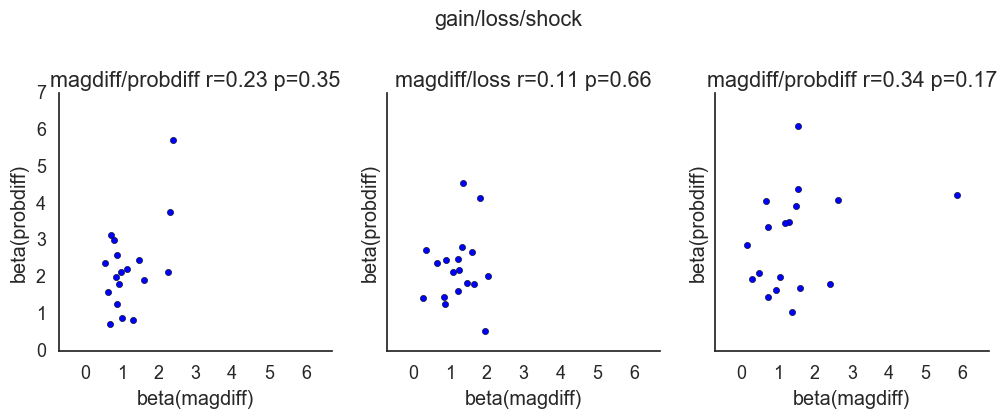

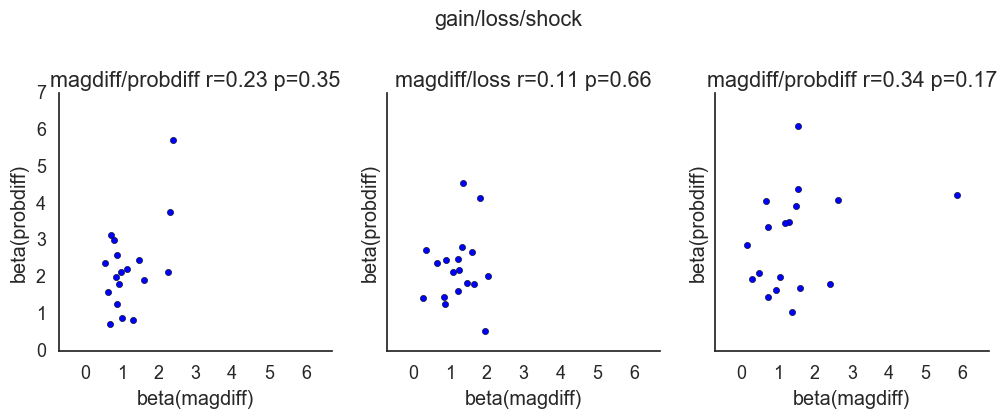

In [23]:
plotTriplet_task(gain, loss, shock)

# GLMs (Statistics)

## Group Ambiguity Differences Across Tasks

### Task differences in ambiguity level 

In [25]:
model_param_df.head()

,MID,parameter,beta,se,task
1,vp06,intercept_r,-0.061001,0.192275138247,loss
2,vp06,mag_diff_rl,1.961943,0.392618031585,loss
3,vp06,prob_diff_rl,0.541789,0.261913340928,loss
4,vp06,sqrt_prop_revealed_diff_rl,0.080113,0.191073697039,loss
5,vp07,intercept_r,0.233115,0.202123160062,loss


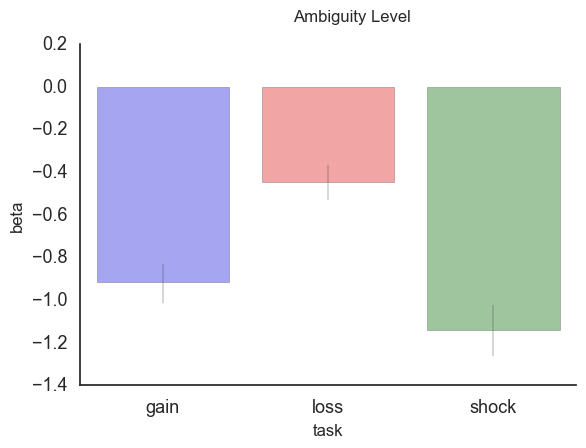

In [55]:
model_df = model_param_df.loc[model_param_df['parameter'] == 'sqrt_prop_revealed_diff_rl']
fig = plot_bargraph_single_param_rl(model_df,stripplot=False,outlier_cutoff=None, suptitle='Ambiguity Level', ylabel='beta', xlabel='task', widtherr = 0.3)



#### Gain as reference

In [48]:
#df.gain_or_loss_trial.astype('category')
y,X = dmatrices('beta ~ task', data = model_df, return_type='dataframe')
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
========================================================
Model:              MixedLM Dependent Variable: beta    
No. Observations:   54      Method:             REML    
No. Groups:         18      Scale:              0.1692  
Min. group size:    3       Likelihood:         -34.9822
Max. group size:    3       Converged:          Yes     
Mean group size:    3.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.913    0.105 -8.690 0.000 -1.119 -0.707
task[T.loss]   0.465    0.137  3.395 0.001  0.197  0.734
task[T.shock] -0.226    0.137 -1.647 0.100 -0.494  0.043
Intercept RE   0.030    0.092                           
========================================================

"""

#### Loss as reference

In [51]:
#tweak X, so that loss is the reference category instead of gain
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)

In [52]:
#run releveled model
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
========================================================
Model:              MixedLM Dependent Variable: beta    
No. Observations:   54      Method:             REML    
No. Groups:         18      Scale:              0.1692  
Min. group size:    3       Likelihood:         -34.9822
Max. group size:    3       Converged:          Yes     
Mean group size:    3.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.448    0.105 -4.261 0.000 -0.654 -0.242
task[T.shock] -0.691    0.137 -5.042 0.000 -0.960 -0.423
task[T.gain]  -0.465    0.137 -3.395 0.001 -0.734 -0.197
Intercept RE   0.030    0.092                           
========================================================

"""

#### shock as reference

In [53]:
#tweak X, so that shock is the reference category instead of gain
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)

In [54]:
#run releveled model
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
========================================================
Model:              MixedLM Dependent Variable: beta    
No. Observations:   54      Method:             REML    
No. Groups:         18      Scale:              0.1692  
Min. group size:    3       Likelihood:         -34.9822
Max. group size:    3       Converged:          Yes     
Mean group size:    3.0                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -1.139    0.105 -10.838 0.000 -1.345 -0.933
task[T.gain]  0.226    0.137   1.647 0.100 -0.043  0.494
task[T.loss]  0.691    0.137   5.042 0.000  0.423  0.960
Intercept RE  0.030    0.092                            
========================================================

"""

## Risk Preference Differences Across Tasks

### Magnitude

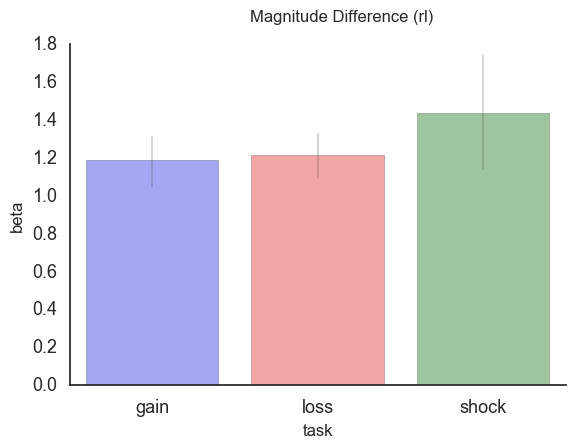

In [57]:
model_df = model_param_df.loc[model_param_df['parameter'] == 'mag_diff_rl']
fig = plot_bargraph_single_param_rl(model_df,stripplot=False,outlier_cutoff=None, suptitle='Magnitude Difference (rl)', ylabel='beta', xlabel='task', widtherr = 0.3)


#### Gain as reference

In [58]:
#df.gain_or_loss_trial.astype('category')
y,X = dmatrices('beta ~ task', data = model_df, return_type='dataframe')
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
======================================================
Model:            MixedLM Dependent Variable: beta    
No. Observations: 54      Method:             REML    
No. Groups:       18      Scale:              0.6477  
Min. group size:  3       Likelihood:         -68.9033
Max. group size:  3       Converged:          Yes     
Mean group size:  3.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     1.188    0.204 5.824 0.000  0.788  1.588
task[T.loss]  0.029    0.268 0.107 0.915 -0.497  0.554
task[T.shock] 0.251    0.268 0.936 0.349 -0.275  0.777
Intercept RE  0.102    0.174                          
======================================================

"""

#### Loss as reference

In [59]:
#tweak X, so that loss is the reference category instead of gain
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)

In [60]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
========================================================
Model:              MixedLM Dependent Variable: beta    
No. Observations:   54      Method:             REML    
No. Groups:         18      Scale:              0.6477  
Min. group size:    3       Likelihood:         -68.9033
Max. group size:    3       Converged:          Yes     
Mean group size:    3.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.217    0.204  5.964 0.000  0.817  1.617
task[T.shock]  0.222    0.268  0.829 0.407 -0.303  0.748
task[T.gain]  -0.029    0.268 -0.107 0.915 -0.554  0.497
Intercept RE   0.102    0.174                           
========================================================

"""

#### Shock as Reference

In [61]:
#tweak X, so that shock is the reference category instead of gain
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)

In [62]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: beta    
No. Observations:  54      Method:             REML    
No. Groups:        18      Scale:              0.6477  
Min. group size:   3       Likelihood:         -68.9033
Max. group size:   3       Converged:          Yes     
Mean group size:   3.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.439    0.204  7.054 0.000  1.039  1.839
task[T.gain] -0.251    0.268 -0.936 0.349 -0.777  0.275
task[T.loss] -0.222    0.268 -0.829 0.407 -0.748  0.303
Intercept RE  0.102    0.174                           
=======================================================

"""

### Probability

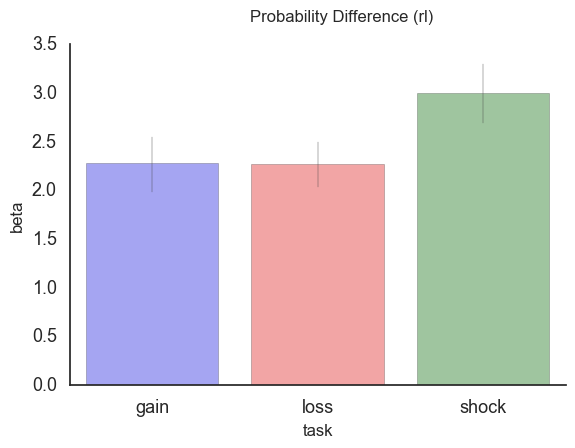

In [63]:
model_df = model_param_df
model_df = model_param_df.loc[model_param_df['parameter'] == 'prob_diff_rl']
fig = plot_bargraph_single_param_rl(model_df,stripplot=False,outlier_cutoff=None, suptitle='Probability Difference (rl)', ylabel='beta', xlabel='task', widtherr = 0.3)

#### Gain as Reference

In [64]:
y,X = dmatrices('beta ~ task', data = model_df, return_type='dataframe')
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
========================================================
Model:              MixedLM Dependent Variable: beta    
No. Observations:   54      Method:             REML    
No. Groups:         18      Scale:              0.5515  
Min. group size:    3       Likelihood:         -76.0454
Max. group size:    3       Converged:          Yes     
Mean group size:    3.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      2.278    0.277  8.222 0.000  1.735  2.821
task[T.loss]  -0.005    0.248 -0.020 0.984 -0.490  0.480
task[T.shock]  0.726    0.248  2.934 0.003  0.241  1.212
Intercept RE   0.831    0.601                           
========================================================

"""

#### Loss as Reference

In [65]:
#tweak X, so that loss is the reference category instead of gain
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)

In [66]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
======================================================
Model:            MixedLM Dependent Variable: beta    
No. Observations: 54      Method:             REML    
No. Groups:       18      Scale:              0.5515  
Min. group size:  3       Likelihood:         -76.0454
Max. group size:  3       Converged:          Yes     
Mean group size:  3.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     2.273    0.277 8.204 0.000  1.730  2.816
task[T.shock] 0.731    0.248 2.954 0.003  0.246  1.216
task[T.gain]  0.005    0.248 0.020 0.984 -0.480  0.490
Intercept RE  0.831    0.601                          
======================================================

"""

#### Shock as Reference

In [67]:
#tweak X, so that shock is the reference category instead of gain
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)

In [68]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: beta    
No. Observations:  54      Method:             REML    
No. Groups:        18      Scale:              0.5515  
Min. group size:   3       Likelihood:         -76.0454
Max. group size:   3       Converged:          Yes     
Mean group size:   3.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     3.005    0.277 10.843 0.000  2.462  3.548
task[T.gain] -0.726    0.248 -2.934 0.003 -1.212 -0.241
task[T.loss] -0.731    0.248 -2.954 0.003 -1.216 -0.246
Intercept RE  0.831    0.601                           
=======================================================

"""

# Convert and save notebook as pdf

In [ ]:
#%%bash 
#jupyter nbconvert --to slides Clinical_DM_Learning_Rate_Difference_Anx_Dep.ipynb && mv Clinical_DM_Learning_Rate_Difference_Anx_Dep.slides.html Clinical_DM_Learning_Rate_Difference_Anx_Dep_v1.slides.html
#jupyter nbconvert --to html Example_analyze_emmas_fmri_shock_data.ipynb && mv Example_analyze_emmas_fmri_shock_data.html ../html_reports/Example_analyze_emmas_fmri_shock_data_v1.html
#jupyter nbconvert --to pdf --template pdf_template_nocode.tplx Basic_Analyses.ipynb

#cp Basic_Analyses.pdf ../reports/Basic_Analyses_12_13_2017.pdf
#cp Basic_Analyses.ipynb ../reports/Basic_Analyses_12_13_2017.ipynb